<a href="https://colab.research.google.com/github/Nargis45/feature_engineering/blob/main/Random_sample_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
df['Age'].isnull().sum()

177

In [13]:
#picking the values from not null values and filling the null places.
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0) # random_state will fix the sample values for null places

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
def impute_nan(df,variable, median):
  df[variable+'_median']=df[variable].fillna(median)
  df[variable+'_random']=df[variable]
  #it will have random sample to fill nan
  random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)
  #pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [21]:
median=df['Age'].median()

In [22]:
median

28.0

In [23]:
impute_nan(df,'Age',median)

In [24]:
df.tail()

,Survived,Age,Fare,Age_median,Age_random
886,0,27.0,13.00,27.0,27.0
887,1,19.0,30.00,19.0,19.0
888,0,NaN,23.45,28.0,15.0
889,1,26.0,30.00,26.0,26.0
890,0,32.0,7.75,32.0,32.0


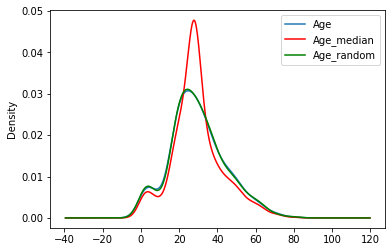

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) #kde-->kernal density estimators
df['Age_median'].plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')